<img src='https://github.com/Ikomia-dev/notebooks/blob/main/examples/img/banner_ikomia.png?raw=true'>




# How to use YOLOv9 & SAM to detect and segment specific objects

## Setup

You need to install Ikomia Python API with pip


In [ ]:
!pip install ikomia

---


**-Google Colab ONLY- Restart runtime**

Some Python packages have been updated. Please click on the "RESTART RUNTIME" button at the end the previous window.

---


## Create a workflow with YOLOv9 for Object Detection and SAM for segmentation

In [ ]:
from ikomia.dataprocess.workflow import Workflow
from ikomia.utils import ik
from ikomia.utils.displayIO import display

# Init your workflow
wf = Workflow()

yolo = wf.add_task(ik.infer_yolo_v9(model_name='yolov9-c', conf_thres='0.4'), auto_connect=True)

filter = wf.add_task(ik.ik_object_detection_filter(categories = "laptop"), auto_connect=True)

sam = wf.add_task(ik.infer_mobile_segment_anything(), auto_connect=True) # Lighter and faster then SAM
# sam = wf.add_task(ik.infer_segment_anything(model_name='vit_l'),auto_connect=True)




pexels-photo-2962135.jpeg: 100%|██████████| 122k/122k [00:00<00:00, 13.0MiB/s]
Fusing layers... 


Will run on cuda


Model summary: 962 layers, 51182080 parameters, 0 gradients, 239.9 GFLOPs


Running...
Workflow Untitled run successfully in 1147.915559 ms.


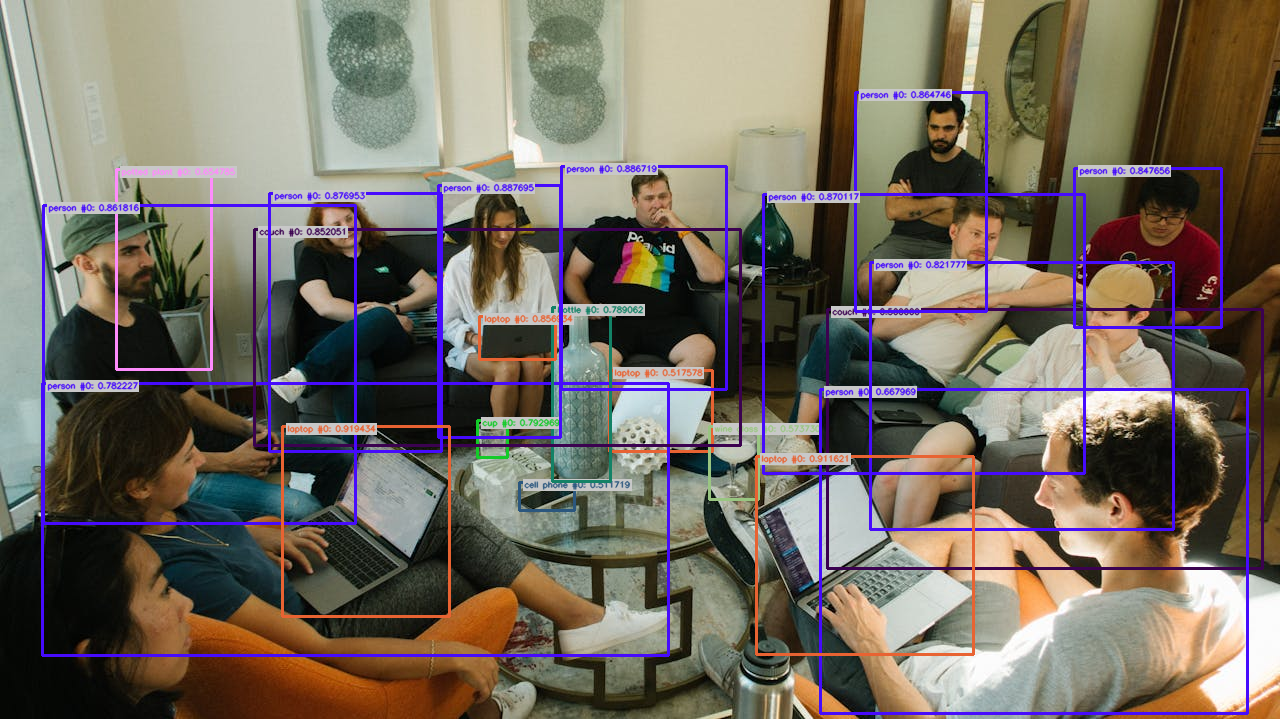

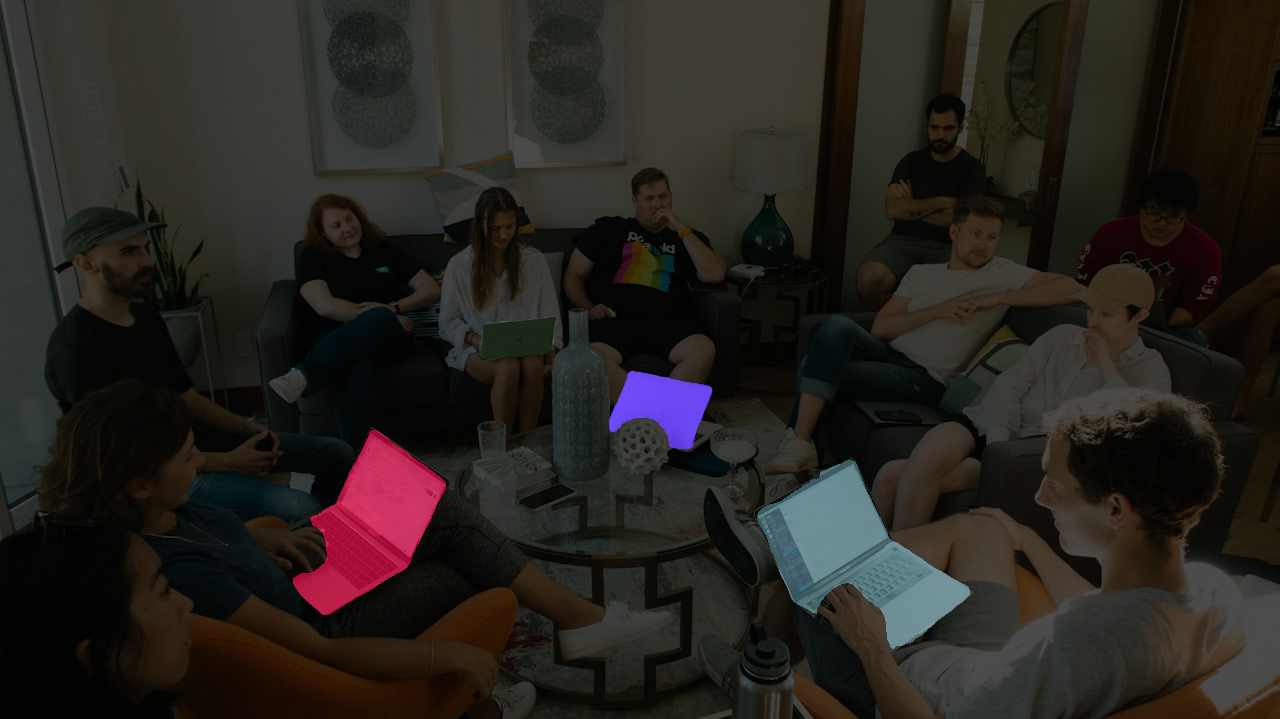

In [25]:
from PIL import ImageShow
ImageShow.register(ImageShow.IPythonViewer(), 0)

# Run directly on your image
wf.run_on(url="https://images.pexels.com/photos/2962135/pexels-photo-2962135.jpeg?cs=srgb&dl=pexels-athena-2962135.jpg&fm=jpg&w=1280&h=719")

# Display the YOLOv9 and SAM outputs
display(yolo.get_image_with_graphics())
display(sam.get_image_with_mask())